In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.integrate import quad as quad

In [2]:
x = np.linspace(0, 1, 201)

def ROC(x):
    return 1 - (1 - np.sqrt(x))**2

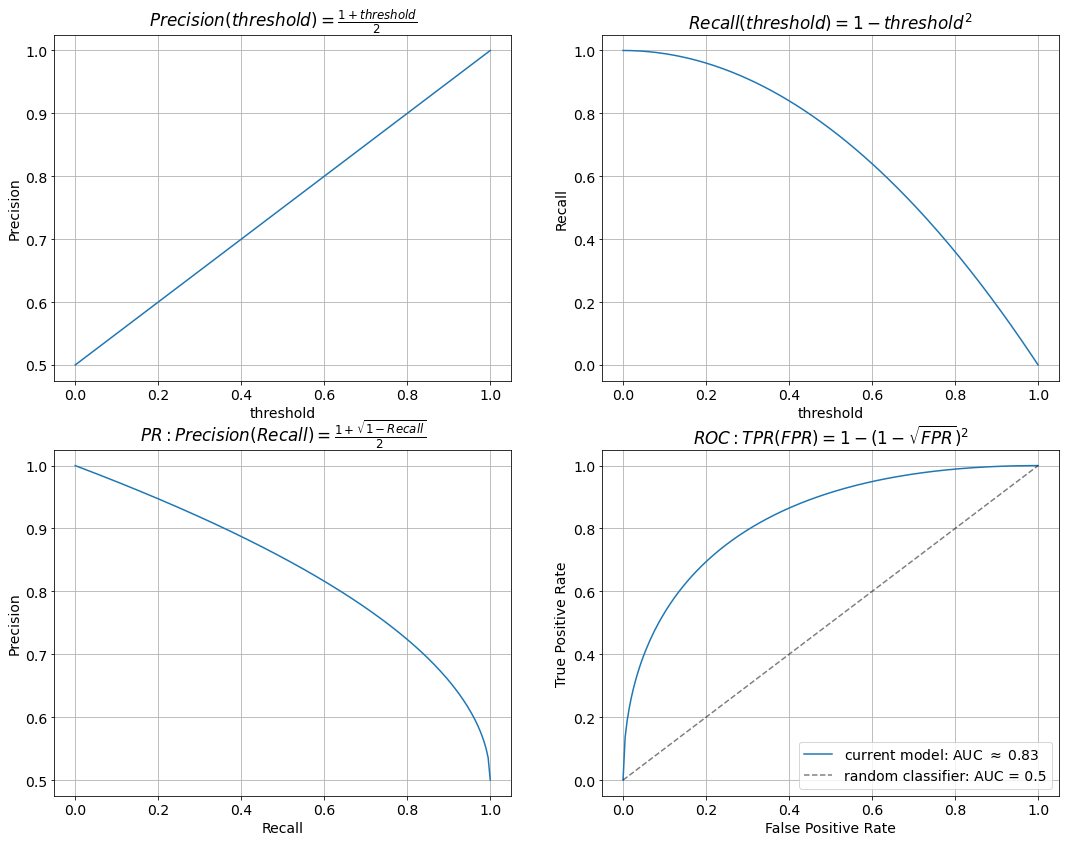

In [3]:
plt.rcParams.update({"font.size": 14})
fig, ax = plt.subplots(2, 2, figsize=(18, 14))

pr = (1 + x) / 2
recall = 1 - x**2
P = (1 + np.sqrt(1 - x)) / 2
TPR = 1 - (1 - np.sqrt(x))**2

ax[0, 0].plot(x, pr)
ax[0, 0].set_xlabel("threshold")
ax[0, 0].set_ylabel("Precision")
ax[0, 0].set_title(r"$Precision(threshold) = \frac{1 + threshold}{2}$")
ax[0, 0].grid()

ax[0, 1].plot(x, recall)
ax[0, 1].set_xlabel("threshold")
ax[0, 1].set_ylabel("Recall")
ax[0, 1].set_title(r"$Recall(threshold) = 1 - {threshold}^2$")
ax[0, 1].grid()

ax[1, 0].plot(x, P)
ax[1, 0].set_xlabel("Recall")
ax[1, 0].set_ylabel("Precision")
ax[1, 0].set_title(r"$PR: Precision(Recall) = \frac{1 + \sqrt{1 - Recall}}{2}$")
ax[1, 0].grid()

ax[1, 1].plot(x, TPR, label=fr"current model: AUC $\approx$ {np.around(quad(ROC, 0, 1)[0], decimals=2)}")
ax[1, 1].plot(x, x, label="random classifier: AUC = 0.5", linestyle="--", color="k", alpha=0.5)
ax[1, 1].set_xlabel("False Positive Rate")
ax[1, 1].set_ylabel("True Positive Rate")
ax[1, 1].set_title(r"$ROC: TPR(FPR) = 1 - (1 - \sqrt{FPR})^2$")
ax[1, 1].legend(loc="lower right")
ax[1, 1].grid()

plt.savefig("Result")
plt.show()